# A Quick Tutorial

In this example, we sample a truncated Gaussian distribution centered at the origin and restricted to a simplex. To reduce the amount of required code, we rely on hopsy.setup() to heuristically set sensible defaults for us.
The simplex inequality is given as
$$
    Ax = \begin{pmatrix}
         1 &  1 & \cdots &  1 \\
        -1 &  0 & \cdots &  0 \\
         0 & -1 & \cdots &  0 \\
         \vdots & \vdots & \cdots & \vdots \\
         0 &  0 & \cdots & -1
    \end{pmatrix} \begin{pmatrix}
        x_1 \\
        \vdots \\
        x_n
    \end{pmatrix} \leq \begin{pmatrix}
        1 \\
        0 \\
        \vdots \\
        0
    \end{pmatrix} = b,
$$
with $A \in \mathbb{R}^{m \times n}$, $x \in \mathbb{R}^n$ and $b \in \mathbb{R}^m$.
Since the Gaussian distribution is included in ``hopsy`` as a model, 
we do not have to worry further about it for the following example.

Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-22
Acceptance rates (per chain): 1.0 1.0 1.0 1.0
Ess (for all chains): [[19990.02206217 19463.9249551  18939.15180953]]
Ess per chain (100+ is usually good enough): [[4997.50551554 4865.98123877 4734.78795238]]


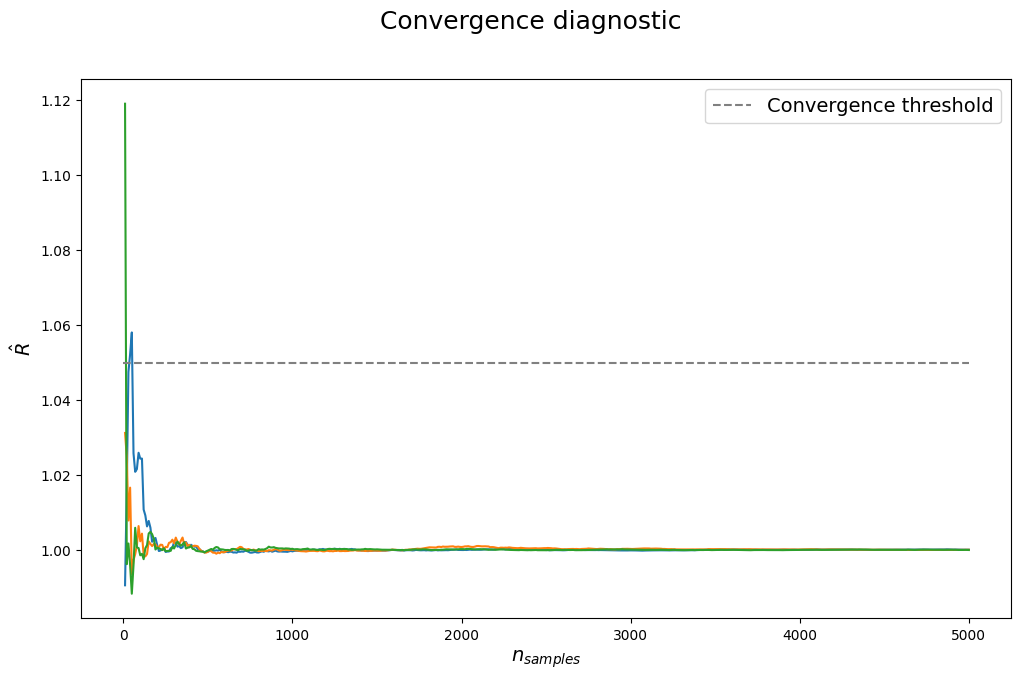

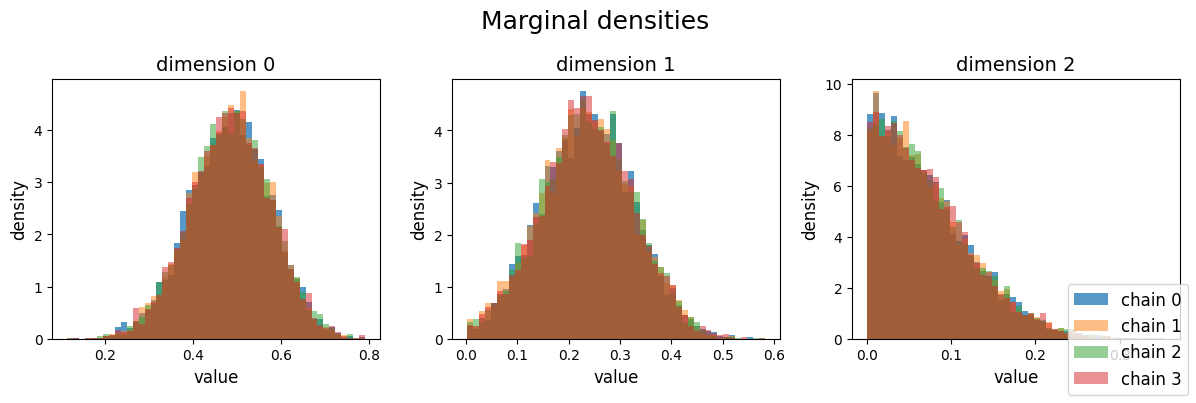

In [1]:
import hopsy
import matplotlib.pyplot as plt
import numpy as np

# set up the polytope inequality for a 3-dimensional simplex
A, b = [[1, 1, 1], [-1, 0, 0], [0, -1, 0], [0, 0, -1]], [1, 0, 0, 0]

# create a 3-dimensional gaussian model centered at the origin
model = hopsy.Gaussian(mean=[0.5, 0.25, 0], covariance=0.01*np.identity(3))

# set up the problem
problem = hopsy.Problem(A, b, model)

# hopsy.setup creates markov chains with a herustic selection of proposal algorithm and tunes the acceptance rate of the chains, if the chains have the step size parameter.
# For the case of a Gaussian on the polytope, the TruncatedGaussianProposal is the best algorithm and it is automatically selected.
random_seed = 511
n_chains = 4 # Not required, will use number of available cpu cores otherwise
chains, rngs = hopsy.setup(problem, random_seed=random_seed, n_chains=n_chains)
# Below we run hopsy.setup again but overwrite the default proposal selection and use markov chain tuning

# and now for the fun!
n_samples = 5000
accrate, states = hopsy.sample(chains, rngs, n_samples=n_samples, thinning=10)

# when doing mcmc, assessing convergence is very important!
rhat = hopsy.rhat(states, series=10)

print('Acceptance rates (per chain):', *accrate)

ess = hopsy.ess(states)
print('Ess (for all chains):', hopsy.ess(states))
print('Ess per chain (100+ is usually good enough):', ess/len(chains))

fig, ax = plt.subplots(1, 1, figsize=(12,7))
plt.suptitle("Convergence diagnostic", fontsize=18)

ax.plot(range(10, n_samples+10, 10), rhat)
# The convergence threshold depends on how strict the sample quality is evaluated. Typical values are 1.1, 1.05, 1.02 and 1.01.
ax.plot([0, n_samples], [1.05, 1.05], linestyle='dashed', color='gray',
        label='Convergence threshold')

ax.set_xlabel(r"$n_{samples}$", fontsize=14)
ax.set_ylabel(r"$\hat{R}$", fontsize=14)
ax.legend(fontsize=14)


n_dims = 3
n_cols = 3
n_rows = 1
plt.figure(figsize=(n_cols * 4, n_rows * 4))
plt.subplot(n_rows, n_cols, 1)
plt.suptitle("Marginal densities", fontsize=18)

for dim in range(n_dims):
    plt.subplot(n_rows, n_cols, dim + 1)
    plt.title(f"dimension {dim}", fontsize=14)
    chain_index = 0 
    _, bins, _ = plt.hist(
        states[chain_index,:,dim],
        bins=50,
        density=True,
        label=f"chain {chain_index}" if dim == 0 else None,
        alpha=0.75,
        color="C0")
    for chain_index in range(1, n_chains):
        _ = plt.hist(
            states[chain_index,:,dim],
            bins=bins,
            alpha=0.5,
            density=True,
            label=f"chain {chain_index}" if dim == 0 else None,
            color=f"C{chain_index}",
        )

    plt.ylabel('density', fontsize=12)
    plt.xlabel('value', fontsize=12)

plt.figlegend(fontsize=12, loc='lower right')
plt.tight_layout()
plt.show()